In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))


In [3]:
# Compiling the CNN
classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])


In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               4224      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) ## rescaling our image pixel 

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\sapna\Desktop\Projects\chest_xray\train',
                                                 target_size = (64, 64),
                                                 batch_size = 60,
                                                 class_mode="binary")

test_set = test_datagen.flow_from_directory(r'C:\Users\sapna\Desktop\Projects\chest_xray\test',
                                            target_size = (64, 64),
                                            batch_size = 60,
                                            class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
training_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
output=classifier.fit(training_set,epochs=20,validation_data=test_set)

Epoch 1/20
87/87 [==============================] - 190s 2s/step - loss: 0.5861 - accuracy: 0.7299 - val_loss: 0.6628 - val_accuracy: 0.6250
Epoch 2/20
87/87 [==============================] - 189s 2s/step - loss: 0.4738 - accuracy: 0.7809 - val_loss: 0.4425 - val_accuracy: 0.8077
Epoch 3/20
87/87 [==============================] - 201s 2s/step - loss: 0.3142 - accuracy: 0.8683 - val_loss: 0.4390 - val_accuracy: 0.7853
Epoch 4/20
87/87 [==============================] - 188s 2s/step - loss: 0.2873 - accuracy: 0.8746 - val_loss: 0.5561 - val_accuracy: 0.7452
Epoch 5/20
87/87 [==============================] - 187s 2s/step - loss: 0.2807 - accuracy: 0.8819 - val_loss: 0.3726 - val_accuracy: 0.8301
Epoch 6/20
87/87 [==============================] - 188s 2s/step - loss: 0.2829 - accuracy: 0.8802 - val_loss: 0.3457 - val_accuracy: 0.8686
Epoch 7/20
87/87 [==============================] - 188s 2s/step - loss: 0.2518 - accuracy: 0.8970 - val_loss: 0.3568 - val_accuracy: 0.8542
Epoch 8/20
87

In [9]:
classifier.save('CovidPneumoniaX_ray')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: CovidPneumoniaX_ray\assets


In [10]:
from keras.models import load_model
from keras_preprocessing import image 
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

In [11]:
model=load_model("CovidPneumoniaX_ray")

In [12]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255
    prediction= model.predict_classes(raw_img)[0][0]
    #Probability = model.predict(raw_img)[0][0]
    accuracy = model.predict(raw_img)[0][0]
    plt.imshow(cv2.imread(path))
    #print('Probability',Probability)
    print('Accuracy',accuracy)
    if prediction:
        print("its a Pneumonia")
    else:
        print("its a Normal")

In [13]:
import os 
import warnings 
warnings.filterwarnings("ignore")
os.getcwd()

'C:\\Users\\sapna\\Desktop\\Projects\\chest_xray'

Accuracy 0.04469967
its a Normal


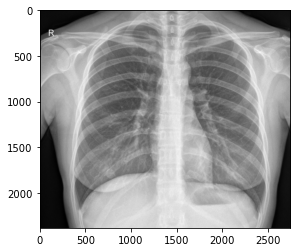

In [17]:
model_output ("IM-0045-0001.jpeg")

Accuracy 0.99715817
its a Pneumonia


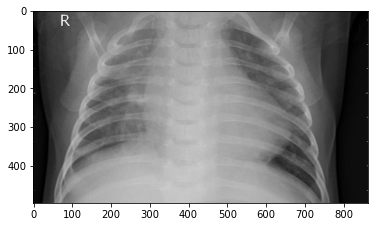

In [18]:
model_output("person122_bacteria_586.jpeg")